# Exemplo simples de árvore de decisão - Dataset Iris

In [1]:
# sklearn é uma biblioteca que contém várias implementações de algoritmos de aprendizado de máquina
from sklearn import tree

import pandas as pd 

In [3]:
dfIris = pd.read_csv('../data/Iris.csv').set_index('Id')
dfIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
#Transforma a coluna 'Species' em categoria
dfIris['Species'] = pd.Categorical(dfIris['Species'])

#Gera um código numérico para cada categoria
dfIris['code'] = dfIris['Species'].cat.codes

dfIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,code
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,2


In [4]:
from collections import Counter

#Contando o número de objetos por classes
print(Counter(dfIris['Species']))
print(Counter(dfIris['code']))

dfIris

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})
Counter({0: 50, 1: 50, 2: 50})


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,code
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,2
148,6.5,3.0,5.2,2.0,Iris-virginica,2


In [7]:
#Função para dividir o dataframe em treino e teste
from sklearn.model_selection import train_test_split

dfIris_train, dfIris_test = train_test_split(dfIris, test_size=0.8, random_state=42)

X = dfIris_train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
print(X)

y = dfIris_train['code']
y

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
92             6.1           3.0            4.6           1.4
42             4.5           2.3            1.3           0.3
59             6.6           2.9            4.6           1.3
91             5.5           2.6            4.4           1.2
49             5.3           3.7            1.5           0.2
89             5.6           3.0            4.1           1.3
108            7.3           2.9            6.3           1.8
125            6.7           3.3            5.7           2.1
22             5.1           3.7            1.5           0.4
58             4.9           2.4            3.3           1.0
145            6.7           3.3            5.7           2.5
130            7.2           3.0            5.8           1.6
38             4.9           3.1            1.5           0.1
141            6.7           3.1            5.6           2.4
2       

Id
92     1
42     0
59     1
91     1
49     0
89     1
108    2
125    2
22     0
58     1
145    2
130    2
38     0
141    2
2      0
53     1
131    2
104    2
100    1
117    2
88     1
75     1
122    2
150    2
21     0
72     1
107    2
15     0
93     1
103    2
Name: code, dtype: int8

[]

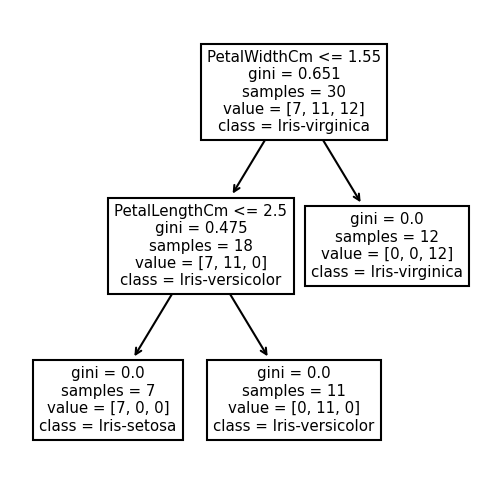

In [14]:
import matplotlib.pyplot as plt

# Instância da árvore de decisão
clf = tree.DecisionTreeClassifier()

# Faz o treinamento com os dados de interesse
clf.fit(X, y)

# Visualiza a árvore encontrada
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=150)
tree.plot_tree(clf, feature_names = X.columns, class_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica']) 
plt.plot()

In [15]:
# Test do modelo - avaliação de desempenho
X_test = dfIris_test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

print(X_test)

y_test = dfIris_test['code']
clf.score(X_test, y_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
74             6.1           2.8            4.7           1.2
19             5.7           3.8            1.7           0.3
119            7.7           2.6            6.9           2.3
79             6.0           2.9            4.5           1.5
77             6.8           2.8            4.8           1.4
..             ...           ...            ...           ...
140            6.9           3.1            5.4           2.1
62             5.9           3.0            4.2           1.5
148            6.5           3.0            5.2           2.0
80             5.7           2.6            3.5           1.0
60             5.2           2.7            3.9           1.4

[120 rows x 4 columns]


0.9333333333333333